In [20]:
from lxml import html
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
page = requests.get('http://www.hallofstats.com/player/ruthba01')
tree = html.fromstring(page.content)
yearsPlayed = tree.xpath('//table[@id="seasonal-stats"]//tr[@class]//th/text()')
yearlyStats = tree.xpath('//table[@id="seasonal-stats"]//tr[@class]//td/text()')

teamOrder = []
yearlyWAA = []
yearlyWAR = []

z = 1
for x in yearlyStats:
    if(z == 1):
        teamOrder.append(x)
        z+=1
    elif(z == 2):
        yearlyWAA.append(x)
        z+=1
    else:
        yearlyWAR.append(x)
        z = 1

d = {'Year' : yearsPlayed, 'Team' : teamOrder, 'WAA' : yearlyWAA, 'WAR' : yearlyWAR}

df = pd.DataFrame(d)

df[['Year', 'WAA', 'WAR']] = df[['Year', 'WAA', 'WAR']].apply(pd.to_numeric)

df

#avgWAR = 0
#for x in df['WAR'] : avgWAR += x
    
#avgWAR /= 21

#avgWAR


,Team,WAA,WAR,Year
0,BOS,-0.3,-0.1,1914
1,BOS,2.5,4.5,1915
2,BOS,7.4,10.4,1916
3,BOS,5.6,8.7,1917
4,BOS,4.4,7.4,1918
5,BOS,6.9,10.2,1919
6,NYY,9.5,11.8,1920
7,NYY,10.0,12.6,1921
8,NYY,4.4,6.3,1922
9,NYY,11.5,14.1,1923


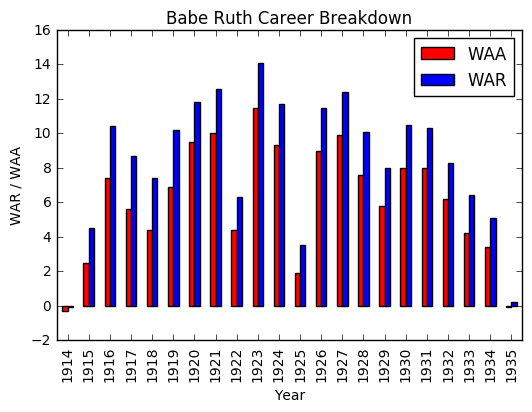

In [62]:
#df.plot(x='Year', y='WAR')
chart = df.plot(kind='bar', x='Year', color=['r', 'b'])
chart.set_ylabel('WAR / WAA')
chart.set_title('Babe Ruth Career Breakdown')
plt.show()